In [66]:
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [67]:
qc = QuantumCircuit(3)
qc.draw()

q_0: 
     
q_1: 
     
q_2:

In [68]:
# Init
for i in range(3):
    qc.h(i)
qc.barrier()
qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     └───┘ ░

In [69]:
def amplification(circuit):
    #newCircuit = QuantumCircuit(3)
    newCircuit = circuit.copy()
    
    for i in range(3):
        newCircuit.h(i)
        newCircuit.z(i)
        
    newCircuit.barrier()
        
    for i in range(3):
        newCircuit.h(i)
    return newCircuit

In [70]:
#circuit = amplification(qc)
#circuit.draw()

In [71]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [72]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [73]:
grover_circuit = QuantumCircuit(3)
for i in range(3):
    grover_circuit.h(i)

In [74]:
grover_circuit.append(oracle_ex3, [0, 1, 2])
grover_circuit.append(diffuser(3), [0, 1, 2])

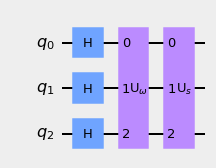

In [75]:
grover_circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

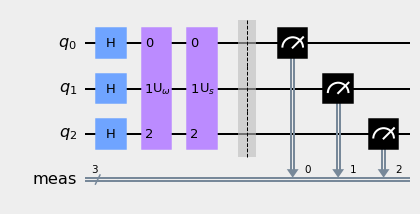

In [76]:
grover_circuit.measure_all()
grover_circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

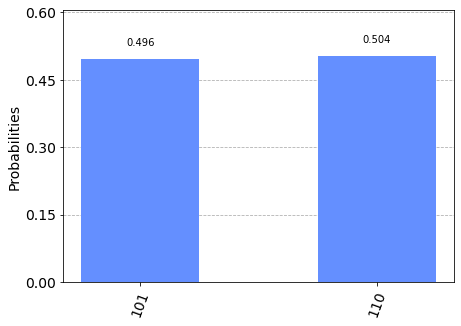

In [77]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [78]:
circuit = diffuser(3)

In [79]:
circuit.draw(output="mpl")

AttributeError: 'Gate' object has no attribute 'draw'

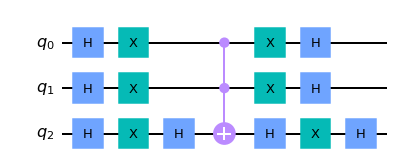

In [82]:
    qc = QuantumCircuit(3)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(3):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(3):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(3-1)
    qc.mct(list(range(3-1)), 3-1)  # multi-controlled-toffoli
    qc.h(3-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(3):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(3):
        qc.h(qubit)
    qc.draw(output="mpl")